In [45]:
# Import seaborn & matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import constants from ggplot_helpers
from seaborn_helpers import *

c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\2024.04.10 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v02\setup\setup.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cdlDF = sqlio.read_sql_query("SELECT * FROM cdl_data", conn)


In [3]:
# Check that dataframe loaded
cdlDF

,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,53374,2024-03-24,Sunday,Simp,Atlanta FaZe,5,Rio,Search & Destroy,9,5,...,1,W,ATL,FaZe,OpTic Texas,TX,4,10,2,0
3756,53374,2024-03-24,Sunday,Dashy,OpTic Texas,5,Rio,Search & Destroy,5,7,...,0,L,TX,OpTic,Atlanta FaZe,ATL,6,10,-2,0
3757,53374,2024-03-24,Sunday,Kenny,OpTic Texas,5,Rio,Search & Destroy,4,9,...,0,L,TX,OpTic,Atlanta FaZe,ATL,6,10,-2,0
3758,53374,2024-03-24,Sunday,Pred,OpTic Texas,5,Rio,Search & Destroy,5,8,...,0,L,TX,OpTic,Atlanta FaZe,ATL,6,10,-2,0


In [ ]:
# Set seaborn theme
sns.set_theme(style = "darkgrid")

In [60]:
# Player Kills Overview
def player_kills_overview(
        player_input: str, gamemode_input: str, cur_line: float, map_input = "All"
):
    # If user selected all maps
    if map_input == "All":

        # Filter data based on user inputs
        filtered_df = \
            cdlDF[(cdlDF["gamemode"] == gamemode_input) & \
            (cdlDF["player"] == player_input)]

    # User selected only one map
    else:

        # Filter data based on user inputs, including map
        filtered_df = \
            cdlDF[(cdlDF["gamemode"] == gamemode_input) & \
            (cdlDF["player"] == player_input) & \
            (cdlDF["map_name"] == map_input)]
        
    # Plot the boxplot
    sns.boxplot(filtered_df, y =  "kills", fill = False)
    
    # Add in points to show each observation
    sns.stripplot(filtered_df, y = "kills", jitter = 0.05)

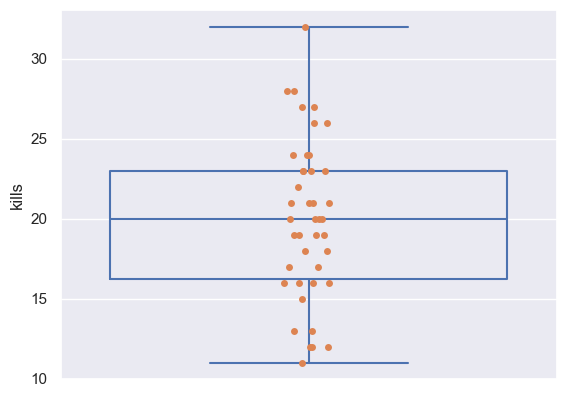

In [61]:
player_kills_overview("Dashy", "Hardpoint", 21)

In [28]:
gamemode_bin_ranges = {
    "Search & Destroy": (-6, 6), 
    "Control": (-3, 3)
}

In [38]:
def team_score_diffs(team_input: str, gamemode_input: str, map_input = "All"):

    # If user selected all maps    
    if map_input == "All":
    
        # Filter data based on user inputs
        filtered_df = \
        cdlDF[(cdlDF['gamemode'] == gamemode_input) & \
                (cdlDF['team'] == team_input)] \
                [['match_id', 'map_name', 'score_diff']].drop_duplicates()
        
        # Initialize facets
        p = sns.FacetGrid(filtered_df, col = "map_name", col_wrap = 3)

        # Histogram for Hardpoint
        if gamemode_input == "Hardpoint":
          
          # Plot the faceted histograms
          p.map_dataframe(
              sns.histplot, x = "score_diff", 
              binwidth = 50, binrange = (-150, 150)
              )
          
        # Bar chart for SnD & Control
        else:

          # Plot the faceted bar charts
          p.map_dataframe(sns.histplot, x = "score_diff", discrete = True, 
                          binrange = gamemode_bin_ranges[gamemode_input])
        
        # Title
        p.figure.suptitle(f"{team_input} Score Differentials: {gamemode_input}")

        # Set facet titles
        p.set_titles("{col_name}")
    
    # User selected only one map 
    else:

        # Filter data based on user inputs, including map
        filtered_df = \
        cdlDF[(cdlDF['gamemode'] == gamemode_input) & \
                (cdlDF['team'] == team_input) & \
                (cdlDF["map_name"] == map_input)] \
                [['match_id', 'map_name', 'score_diff']].drop_duplicates()
        
        # Histogram for Hardpoint
        if gamemode_input == "Hardpoint":

          # Plot the histogram
          p = sns.histplot(
              data = filtered_df, x = "score_diff", 
              binwidth = 50, binrange = (-150, 150)
              )
        
        # Bar chart for SnD & Control
        else:
           
          # Plot the bar chart
          p = sns.histplot(data = filtered_df, x = "score_diff", discrete = True, 
                           binrange = gamemode_bin_ranges[gamemode_input])
        
        # Title
        p.figure.suptitle(f"{team_input} Score Differentials: {map_input} {gamemode_input}")

    # Move title up
    p.figure.subplots_adjust(top = 0.9)
        
    return p

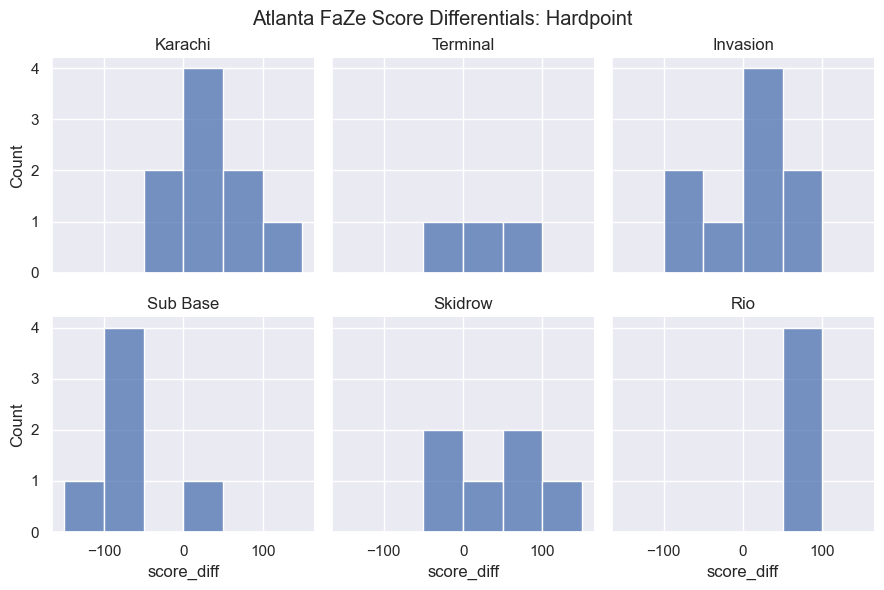

In [39]:
team_score_diffs("Atlanta FaZe", "Hardpoint", "All")

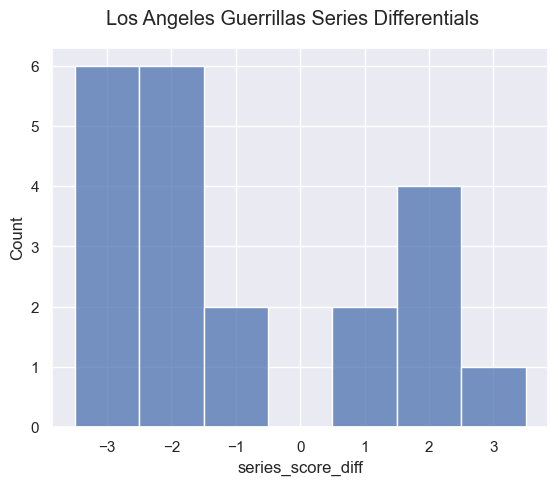

In [11]:
team_series_diffs("Los Angeles Guerrillas")

In [48]:
# Player Kills vs. Time
def player_kills_vs_time(
        player_input: str, gamemode_input: str, cur_line: float, map_input = "All"
):
    
    # If user selects all maps
    if map_input == "All":
        
        filtered_df = \
            cdlDF[(cdlDF["gamemode"] == gamemode_input) & \
                (cdlDF["player"] == player_input)]

    # If user selects only one map
    else:

        filtered_df = \
            cdlDF[(cdlDF["gamemode"] == gamemode_input) & \
                (cdlDF["player"] == player_input) & \
                (cdlDF["map_name"] == map_input)]
        
    
    # Create the line chart 
    sns.scatterplot(
        filtered_df, x = "match_date", y = "kills"
        )
    
    # Add current PrizePicks lines
    plt.axhline(y = cur_line, color = "purple", linestyle = '--')

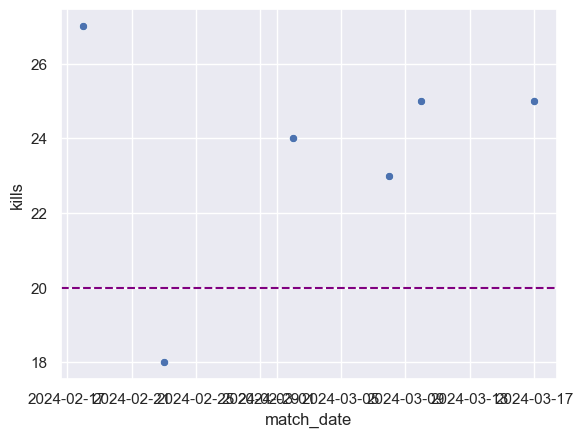

In [49]:
player_kills_vs_time("Kenny", "Hardpoint", 20, "Rio")

In [50]:
# Player Kills vs Score Diff
def player_kills_vs_score_diff(
        player_input: str, gamemode_input: str, cur_line: float, map_input = "All"
):
    
    # If user selects all maps
    if map_input == "All":
        
        filtered_df = \
            cdlDF[(cdlDF["gamemode"] == gamemode_input) & \
                (cdlDF["player"] == player_input)]

    # If user selects only one map
    else:

        filtered_df = \
            cdlDF[(cdlDF["gamemode"] == gamemode_input) & \
                (cdlDF["player"] == player_input) & \
                (cdlDF["map_name"] == map_input)]
        
    
    # Create the line chart 
    sns.scatterplot(
        filtered_df, x = "score_diff", y = "kills"
        )
    
    # Add current PrizePicks lines
    plt.axhline(y = cur_line, color = "purple", linestyle = '--')

    # Add vertical line at x = 0
    plt.axvline(x = 0, color = "orange", linestyle = '--')

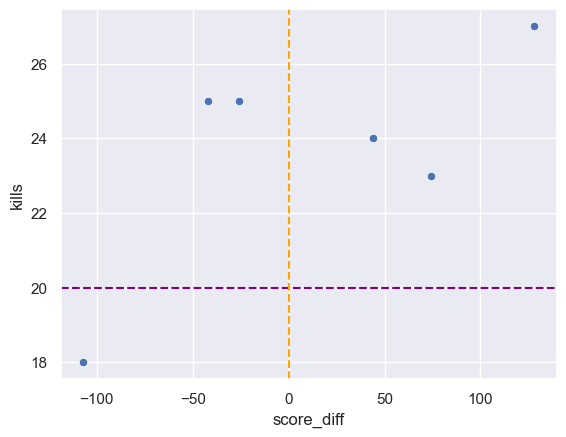

In [53]:
player_kills_vs_score_diff("Kenny", "Hardpoint", 20, "Rio")